In [1]:
# Using different models to find the optimal model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import train_test_split,KFold
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
df=pd.read_csv('new_dataset.csv')

In [3]:
df.duplicated().any()

False

In [4]:
train=df[:3865].drop(['unique_id','galaxy','target'],axis=1)
test=df[3865:].drop(['unique_id','galaxy','target'],axis=1).reset_index().drop('index',axis=1)
target=df[:3865].target

In [5]:
#All our features are categoricall features 
[feat for feat in train.columns if train[feat].dtypes =='object' ]

[]

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(train,target,test_size=0.25, random_state=1)

In [7]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2898, 212), (2898,), (967, 212), (967,))

In [8]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_valid, label=y_valid)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'rmse',
         'learning_rate': 0.05, 
         'num_iterations': 7500,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.8,
         'bagging_freq': 1,
         'feature_fraction': 0.8
         }

clf = lgb.train(params=param, 
                early_stopping_rounds=100,
                verbose_eval=100,
                train_set=train_data,
                valid_sets=[test_data])


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0283665
[200]	valid_0's rmse: 0.0275064
[300]	valid_0's rmse: 0.0273765
[400]	valid_0's rmse: 0.0272992
[500]	valid_0's rmse: 0.0272514
[600]	valid_0's rmse: 0.0272241
[700]	valid_0's rmse: 0.0272233
[800]	valid_0's rmse: 0.0271887
[900]	valid_0's rmse: 0.0271869
Early stopping, best iteration is:
[832]	valid_0's rmse: 0.0271743


In [9]:
Xtest=test.copy()
X=train
y=target

In [10]:
errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)
    
    clf = lgb.train(params=param, 
                     early_stopping_rounds=100,
                     verbose_eval=100,
                     train_set=train_data,
                     valid_sets=[test_data])

    y_pred = clf.predict(X_test) 

    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    
    errlgb.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    p = clf.predict(Xtest)
    
    y_pred_totlgb.append(p)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0232086
[200]	valid_0's rmse: 0.0228003
[300]	valid_0's rmse: 0.022745
Early stopping, best iteration is:
[247]	valid_0's rmse: 0.0226674
RMSE:  0.022667381590053676
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0243629
[200]	valid_0's rmse: 0.0240853
[300]	valid_0's rmse: 0.0239878
[400]	valid_0's rmse: 0.0240134
Early stopping, best iteration is:
[315]	valid_0's rmse: 0.0239534
RMSE:  0.02395336587950197
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0299852
[200]	valid_0's rmse: 0.0293794
[300]	valid_0's rmse: 0.0291148
[400]	valid_0's rmse: 0.0291257
[500]	valid_0's rmse: 0.0291108
Early stopping, best iteration is:
[427]	valid_0's rmse: 0.0290682
RMSE:  0.029068217136741233
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.026486
[200]	valid_0's rmse: 0.0261202
[300]	valid_0's rmse: 

In [11]:
np.mean(y_pred_totlgb,0)

array([0.04201294, 0.04037612, 0.04132944, 0.0431078 , 0.02197967,
       0.02989816, 0.03022601, 0.03979245, 0.03981852, 0.04010945,
       0.03944206, 0.02271708, 0.0410512 , 0.03967769, 0.03050738,
       0.04132292, 0.0204    , 0.02930004, 0.04011872, 0.04052556,
       0.04121661, 0.02332719, 0.04061308, 0.02009203, 0.04220308,
       0.0239272 , 0.02773049, 0.03909273, 0.04230421, 0.03110546,
       0.04136923, 0.0414798 , 0.04126779, 0.04245128, 0.01895647,
       0.03963248, 0.04223261, 0.03868068, 0.02283972, 0.01963101,
       0.04223385, 0.0216273 , 0.04146194, 0.04008848, 0.04129579,
       0.03181279, 0.0402306 , 0.027166  , 0.03968258, 0.01947658,
       0.04243246, 0.04043516, 0.02219998, 0.03927663, 0.02277632,
       0.04302188, 0.02010326, 0.02098958, 0.01905017, 0.04002982,
       0.03128634, 0.04507091, 0.03118041, 0.0391123 , 0.03153306,
       0.04435669, 0.04156828, 0.02143475, 0.04128635, 0.05160732,
       0.04424869, 0.03850009, 0.02265756, 0.03217599, 0.04186

In [12]:
np.mean(errlgb, 0)

0.025140915756858413

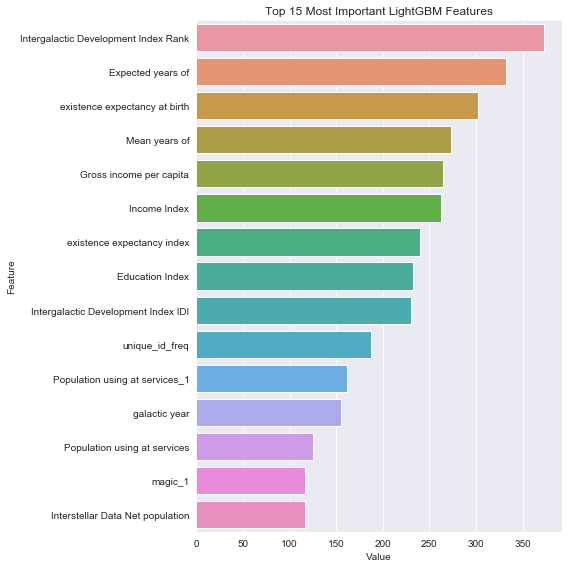

In [13]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(), X.columns), reverse=True)[:15], columns=['Value','Feature'])
plt.figure(figsize=(8,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Top 15 Most Important LightGBM Features')
plt.tight_layout()
plt.show()

In [14]:
y_pred = np.mean(y_pred_totlgb,0)

In [15]:
#Creating the Submission file

test['index']=test.index
test['pred']=y_pred
sub=test[['pred','existence expectancy index']]

In [17]:
test

,Adjusted net savings,Adolescent birth rate ages,Creature Immunodeficiency Disease total,Current health expenditure GGP,Domestic credit provided GGP,Education Index,Employment in agriculture employment,Employment in services employment,Employment to population older,Estimated gross galactic female,...,magic_11,magic2_11,magic_12,magic2_12,magic_13,magic2_13,magic_14,magic2_14,index,pred
0,NaN,NaN,NaN,NaN,NaN,0.556267,NaN,NaN,NaN,NaN,...,0.082176,0.082198,0.082179,0.082209,0.082191,0.082218,0.082124,0.082229,0,0.042013
1,NaN,NaN,NaN,NaN,NaN,0.409969,NaN,NaN,NaN,NaN,...,0.082179,0.082198,0.082191,0.082209,0.082124,0.082218,0.082070,0.082229,1,0.040376
2,NaN,NaN,NaN,NaN,NaN,0.486167,NaN,NaN,NaN,NaN,...,0.082120,0.082133,0.082120,0.082131,0.082120,0.082191,0.082120,0.082188,2,0.041329
3,NaN,NaN,NaN,NaN,NaN,0.523441,NaN,NaN,NaN,NaN,...,0.082191,0.082198,0.082124,0.082209,0.082070,0.082218,0.082074,0.082229,3,0.043108
4,NaN,162.451451,7.687626,7.357729,86.296925,0.580418,89.542879,28.815475,76.50274,18103.974021,...,0.082562,0.082598,0.082580,0.082608,0.082592,0.082616,0.082608,0.082625,4,0.021980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082802,0.082818,0.082802,0.082827,0.082817,0.082835,0.082829,0.082844,885,0.027899
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082802,0.082818,0.082802,0.082827,0.082802,0.082835,0.082817,0.082844,886,0.027894
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082790,0.082818,0.082802,0.082827,0.082802,0.082835,0.082802,0.082844,887,0.028077
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082773,0.082818,0.082773,0.082827,0.082773,0.082835,0.082773,0.082844,888,0.027986


In [18]:
opt_pred=[]
for i in range(890):
    if test['existence expectancy index'][i] < 0.7:
        opt_pred.append(True)
    else:
        opt_pred.append(False)
sub['opt_pred']=opt_pred
sub['opt_pred'].value_counts()

False    824
True      66
Name: opt_pred, dtype: int64

In [19]:
#Distributing the 50,000 Zillion Liter of 
map_p={False:52.75, True:99}
sub['opt_pred']=sub['opt_pred'].map(map_p)
sub.drop('existence expectancy index',axis=1,inplace=True)
sub['index']=sub.index

In [23]:
#Following submission format
sub=sub[['index','pred','opt_pred']]

In [24]:
sub.to_csv('my_latest_sub.csv',index=False)